In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('./BPD_Part_1_Victim_Based_Crime_Data.csv')
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
0,11-12-2016,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,O,NaN,111.0,CENTRAL,Downtown,"(39.2924100000, -76.6140800000)",1
1,11-12-2016,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,I,FIREARM,213.0,SOUTHEASTERN,Fells Point,"(39.2824200000, -76.5928800000)",1
2,11-12-2016,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,O,NaN,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,"(39.3480500000, -76.5883400000)",1
3,11-12-2016,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,O,NaN,424.0,NORTHEASTERN,Westfield,"(39.3626300000, -76.5516100000)",1
4,11-12-2016,03:00:00,6E,300 W BALTIMORE ST,LARCENY,O,NaN,111.0,CENTRAL,Downtown,"(39.2893800000, -76.6197100000)",1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285807 entries, 0 to 285806
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        285807 non-null  object 
 1   CrimeTime        285807 non-null  object 
 2   CrimeCode        285807 non-null  object 
 3   Location         284184 non-null  object 
 4   Description      285807 non-null  object 
 5   Inside/Outside   281611 non-null  object 
 6   Weapon           97396 non-null   object 
 7   Post             285616 non-null  float64
 8   District         285749 non-null  object 
 9   Neighborhood     284106 non-null  object 
 10  Location 1       284188 non-null  object 
 11  Total Incidents  285807 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 26.2+ MB


In [4]:
df.isnull().sum()

CrimeDate               0
CrimeTime               0
CrimeCode               0
Location             1623
Description             0
Inside/Outside       4196
Weapon             188411
Post                  191
District               58
Neighborhood         1701
Location 1           1619
Total Incidents         0
dtype: int64

In [5]:
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'],format = 'mixed')#so convert that to datetime
df_train = df[(df['CrimeDate'].dt.year >=2014) & (df['CrimeDate'].dt.year <=2015)]
df_test =  df[df['CrimeDate'].dt.year == 2016]

In [6]:
df_train

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
644,2015-10-07,00:15:00,4E,NaN,COMMON ASSAULT,I,HANDS,535.0,NORTHERN,NaN,NaN,1
1459,2015-02-22,14:27:00,4E,NaN,COMMON ASSAULT,O,HANDS,835.0,SOUTHWESTERN,NaN,NaN,1
1999,2014-02-26,09:55:00,4E,NaN,COMMON ASSAULT,I,HANDS,433.0,NORTHESTERN,NaN,NaN,1
41292,2015-12-31,00:01:00,6E,2600 NORTHSHIRE DR,LARCENY,O,NaN,923.0,SOUTHERN,Lakeland,"(39.2572900000, -76.6440400000)",1
41293,2015-12-31,00:02:00,4E,1300 N ELLWOOD AVE,COMMON ASSAULT,I,HANDS,332.0,EASTERN,Berea,"(39.3064300000, -76.5737800000)",1
...,...,...,...,...,...,...,...,...,...,...,...,...
136048,2014-01-01,2231,9S,5900 EDNA AV,SHOOTING,Outside,FIREARM,425.0,NORTHEASTERN,Glenham-Belhar,"(39.3542200000, -76.5550700000)",1
136049,2014-01-01,23:00:00,6E,4500 MANORVIEW RD,LARCENY,O,NaN,822.0,SOUTHWESTERN,Uplands,"(39.2867200000, -76.6918900000)",1
136050,2014-01-01,23:10:00,4E,3800 HILLSDALE RD,COMMON ASSAULT,O,HANDS,622.0,NORTHWESTERN,Howard Park,"(39.3352300000, -76.6921100000)",1
136051,2014-01-01,23:12:00,4E,1000 UPNOR RD,COMMON ASSAULT,I,HANDS,523.0,NORTHERN,Cameron Village,"(39.3572700000, -76.5985300000)",1


In [7]:
df_test

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
0,2016-11-12,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,O,NaN,111.0,CENTRAL,Downtown,"(39.2924100000, -76.6140800000)",1
1,2016-11-12,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,I,FIREARM,213.0,SOUTHEASTERN,Fells Point,"(39.2824200000, -76.5928800000)",1
2,2016-11-12,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,O,NaN,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,"(39.3480500000, -76.5883400000)",1
3,2016-11-12,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,O,NaN,424.0,NORTHEASTERN,Westfield,"(39.3626300000, -76.5516100000)",1
4,2016-11-12,03:00:00,6E,300 W BALTIMORE ST,LARCENY,O,NaN,111.0,CENTRAL,Downtown,"(39.2893800000, -76.6197100000)",1
...,...,...,...,...,...,...,...,...,...,...,...,...
41287,2016-01-01,23:00:00,6D,1300 S PONCA ST,LARCENY FROM AUTO,O,NaN,233.0,SOUTHEASTERN,Canton Industrial Area,"(39.2788600000, -76.5544800000)",1
41288,2016-01-01,23:00:00,6E,3600 GWYNN OAK AVE,LARCENY,O,NaN,622.0,NORTHWESTERN,Howard Park,"(39.3317900000, -76.6955700000)",1
41289,2016-01-01,23:00:00,7A,1900 CHARLES ST,AUTO THEFT,O,NaN,141.0,CENTRAL,Charles North,"(39.3113300000, -76.6166100000)",1
41290,2016-01-01,23:30:00,6D,700 BEAVERBROOK RD,LARCENY FROM AUTO,O,NaN,523.0,NORTHERN,Mid-Govans,"(39.3583600000, -76.6060700000)",1


In [8]:
larency_train_df = df_train[df_train['CrimeCode'].str.startswith('6')]
larency_test_df = df_test[df_test['CrimeCode'].str.startswith('6')]
burglary_train_df = df_train[df_train['CrimeCode'].str.startswith('5')]
burglary_test_df = df_test[df_test['CrimeCode'].str.startswith('5')]

In [9]:
larency_train_df

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
41292,2015-12-31,00:01:00,6E,2600 NORTHSHIRE DR,LARCENY,O,NaN,923.0,SOUTHERN,Lakeland,"(39.2572900000, -76.6440400000)",1
41299,2015-12-31,02:00:00,6D,6200 BILTMORE AVE,LARCENY FROM AUTO,O,NaN,632.0,NORTHWESTERN,Glen,"(39.3570600000, -76.6936700000)",1
41303,2015-12-31,04:00:00,6D,200 S EXETER ST,LARCENY FROM AUTO,O,NaN,211.0,SOUTHEASTERN,Little Italy,"(39.2878700000, -76.6015500000)",1
41305,2015-12-31,07:30:00,6D,1600 E LOMBARD ST,LARCENY FROM AUTO,O,NaN,212.0,SOUTHEASTERN,Washington Hill,"(39.2903200000, -76.5959500000)",1
41307,2015-12-31,08:00:00,6D,4700 SHAMROCK AVE,LARCENY FROM AUTO,O,NaN,442.0,NORTHEASTERN,Parkside,"(39.3231400000, -76.5551900000)",1
...,...,...,...,...,...,...,...,...,...,...,...,...
136035,2014-01-01,21:00:00,6G,400 E 25TH ST,LARCENY,I,NaN,341.0,NORTHERN,Barclay,"(39.3180200000, -76.6112300000)",1
136037,2014-01-01,21:15:00,6B,1600 COLE ST,LARCENY,O,NaN,935.0,SOUTHERN,New Southwest/Mount Clare,"(39.2822200000, -76.6423900000)",1
136042,2014-01-01,22:00:00,6D,5300 WYNDHOLME CR #UNIT 102,LARCENY FROM AUTO,O,NaN,833.0,SOUTHWESTERN,Beechfield,"(39.2790200000, -76.7054200000)",1
136043,2014-01-01,22:00:00,6D,1700 DARLEY AV,LARCENY FROM AUTO,O,NaN,342.0,EASTERN,Darley Park,"(39.3147600000, -76.5935600000)",1


In [10]:
larency_train_df = larency_train_df.groupby('CrimeDate')['Total Incidents'].sum().reset_index().sort_values('CrimeDate')
#reset index gives us back as the total incidents column for us so will be useful

In [11]:
larency_test_df = larency_test_df.groupby('CrimeDate')['Total Incidents'].sum().reset_index().sort_values('CrimeDate')
burglary_train_df = burglary_train_df.groupby('CrimeDate')['Total Incidents'].sum().reset_index().sort_values('CrimeDate')
burglary_test_df = burglary_test_df.groupby('CrimeDate')['Total Incidents'].sum().reset_index().sort_values('CrimeDate')
#grouping and getting as only two columns type

In [12]:
burglary_train_df

,CrimeDate,Total Incidents
0,2014-01-01,19
1,2014-01-02,28
2,2014-01-03,13
3,2014-01-04,19
4,2014-01-05,14
...,...,...
725,2015-12-27,19
726,2015-12-28,33
727,2015-12-29,20
728,2015-12-30,24


In [13]:
#creating a timeseries df with 30days as input and 31st as output like take 30 days and doing
def create_dataset(data,timestamp = 1):
    X = []
    y =[]
    for i in range(len(data) - timestamp):
        X.append(data[i:(i+timestamp)])#direct as passing the column only if 2d then column index we can put 
        y.append(data[i+timestamp])
    return np.array(X),np.array(y)
#and decided not to scan as better with without scan

In [14]:
larency_train_X,larency_train_y = create_dataset(larency_train_df.iloc[:,-1],30)#so pass data as the column now and 30 as timestamp 
larency_test_X,larency_test_y = create_dataset(larency_test_df.iloc[:,-1],30)
burglary_train_X,burglary_train_y = create_dataset(burglary_train_df.iloc[:,-1],30) 
burglary_test_X,burglary_test_y = create_dataset(burglary_test_df.iloc[:,-1],30) 

In [15]:
#always check if any null is there we missed that here but shd actually check and remove or fill na as 0

In [16]:
larency_train_X

array([[46, 34, 20, ..., 28, 31, 56],
       [34, 20, 37, ..., 31, 56, 47],
       [20, 37, 31, ..., 56, 47, 55],
       ...,
       [27, 54, 49, ..., 39, 36, 39],
       [54, 49, 51, ..., 36, 39, 47],
       [49, 51, 48, ..., 39, 47, 45]])

In [17]:
larency_train_X.shape

(700, 30)

In [18]:
larency_train_y

array([47, 55, 32, 39, 41, 47, 40, 41, 38, 25, 34, 41, 45, 11, 27, 38, 24,
       34, 37, 37, 46, 53, 57, 38, 38, 40, 27, 36, 51, 40, 27, 19, 30, 38,
       39, 48, 40, 25, 52, 35, 29, 41, 50, 73, 38, 28, 40, 35, 35, 38, 44,
       50, 44, 49, 47, 48, 50, 34, 37, 59, 53, 56, 51, 52, 46, 31, 47, 43,
       53, 52, 47, 50, 36, 59, 50, 41, 61, 45, 45, 45, 44, 42, 59, 42, 44,
       60, 39, 52, 46, 47, 54, 45, 39, 56, 54, 50, 46, 57, 58, 37, 38, 41,
       53, 50, 61, 62, 53, 43, 57, 65, 43, 62, 57, 51, 47, 34, 51, 51, 46,
       46, 50, 50, 51, 38, 59, 49, 54, 53, 44, 59, 40, 49, 38, 48, 55, 59,
       72, 48, 58, 45, 64, 58, 36, 58, 64, 59, 44, 57, 60, 56, 51, 49, 39,
       49, 35, 52, 57, 54, 59, 63, 51, 51, 54, 54, 53, 48, 61, 55, 59, 43,
       71, 59, 46, 57, 62, 65, 62, 63, 50, 60, 65, 54, 69, 47, 48, 56, 51,
       62, 57, 64, 34, 59, 71, 33, 50, 73, 64, 42, 43, 58, 63, 67, 43, 57,
       41, 42, 56, 52, 53, 40, 70, 42, 47, 53, 63, 40, 53, 60, 60, 47, 51,
       45, 64, 58, 61, 49

In [19]:
#building models
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM
from tensorflow.keras.models import Sequential
def create_rnn_model():
    rnn_model = Sequential([
        SimpleRNN(256, activation='relu', return_sequences=True, input_shape=(30,1)),#as we have 30 features and 1 as feature every timestamp
        SimpleRNN(128, activation='relu', return_sequences=True),
        SimpleRNN(64, activation='relu', return_sequences=True),
        SimpleRNN(32, activation='relu'),
        Dense(1)
    ])#use of the activation also inside the rnn can also add dropout,batchnormalization and all see that
    return rnn_model
def create_lstm_model():
    lstm_model = Sequential([
        LSTM(256,activation = 'relu',return_sequences = True,input_shape = (30,1)),
        LSTM(128, activation='relu', return_sequences=True),
        LSTM(64, activation='relu', return_sequences=True),
        LSTM(32, activation='relu'),
        Dense(1)
    ])
    return lstm_model

2024-11-03 15:25:08.490499: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-03 15:25:08.491830: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-03 15:25:08.498593: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-03 15:25:08.517641: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-03 15:25:08.548868: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [20]:
larency_model = {
    'larency_rnn_model': create_rnn_model(),
    'larency_lstm_model': create_lstm_model()
}
burglary_model = {
    'burglary_rnn_model': create_rnn_model(),
    'burglary_lstm_model':create_lstm_model()
}

In [21]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error

def train_models(models,train_x,train_y,test_x,test_y):
    results = []
    for model_name,model in models.items():
        print(f"training model {model_name} \n")
        model.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics = ['mse'])
        print(model.summary())
        history = model.fit(train_x,train_y,epochs= 50,batch_size =32,validation_split = 0.2)
        test_loss,test_mse = model.evaluate(test_x,test_y)

        results.append({
            'model_name':model_name,
            'train_loss':np.array(history.history['loss']).mean(),
            'valiation_loss':np.array(history.history['val_loss']).mean(),#loss and mse same here so
            'test_loss': test_loss
        })
        y_pred = model.predict(test_x)
        mape = mean_absolute_percentage_error(test_y,y_pred)
        rmse = np.sqrt(mean_squared_error(test_y,y_pred))
        print(f"RMSE AND MAPE VALUES FOR MODEL {model_name} are \n")
        print(f"RMSE : {rmse} \n")
        print(f"MAPE : {mape} \n")
        
        #plotting
        plt.figure(figsize = (10,8))
        plt.plot(history.history['loss'],label = 'training loss')
        plt.plot(history.history['val_loss'],label = 'validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'Loss curves of model {model_name}')
        plt.legend(loc='upper right')
        plt.show()
    
        plt.figure(figsize = (10,8))
        plt.plot(test_y,label = 'Actual Incidents values')
        plt.plot(y_pred,label = 'Predicted Incident values')
        plt.xlabel('Days of year 2016')
        plt.ylabel('Total incidents')
        plt.title(f'actual vs prediction of model {model_name}')
        plt.legend(loc='upper right')
        plt.show()
    return results

training model larency_rnn_model 



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 30, 256)        │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 30, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 30, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,817 (511.00 KB)

 Trainable params: 130,817 (511.00 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - loss: 1833.1533 - mse: 1833.1533 - val_loss: 99.1590 - val_mse: 99.1590
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 107.9275 - mse: 107.9275 - val_loss: 93.2373 - val_mse: 93.2373
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 97.8410 - mse: 97.8410 - val_loss: 79.0300 - val_mse: 79.0300
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 92.2892 - mse: 92.2892 - val_loss: 88.0721 - val_mse: 88.0721
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 94.1010 - mse: 94.1010 - val_loss: 84.5966 - val_mse: 84.5966
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 93.6772 - mse: 93.6772 - val_loss: 77.7820 - val_mse: 77.7820
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 98.8273 - mse: 98.8273 - val_loss: 76.9457 - val_mse: 76.9457
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 83.5633 - mse: 83.5633 - val_loss: 76.2677 - val_mse: 76.2677
Epoch 9/50
18/18 ━━━

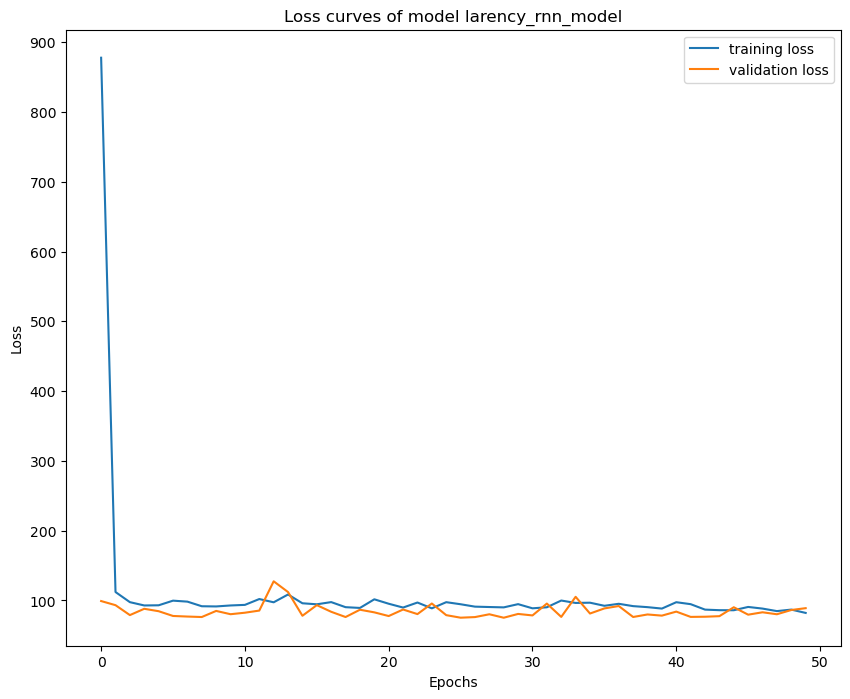

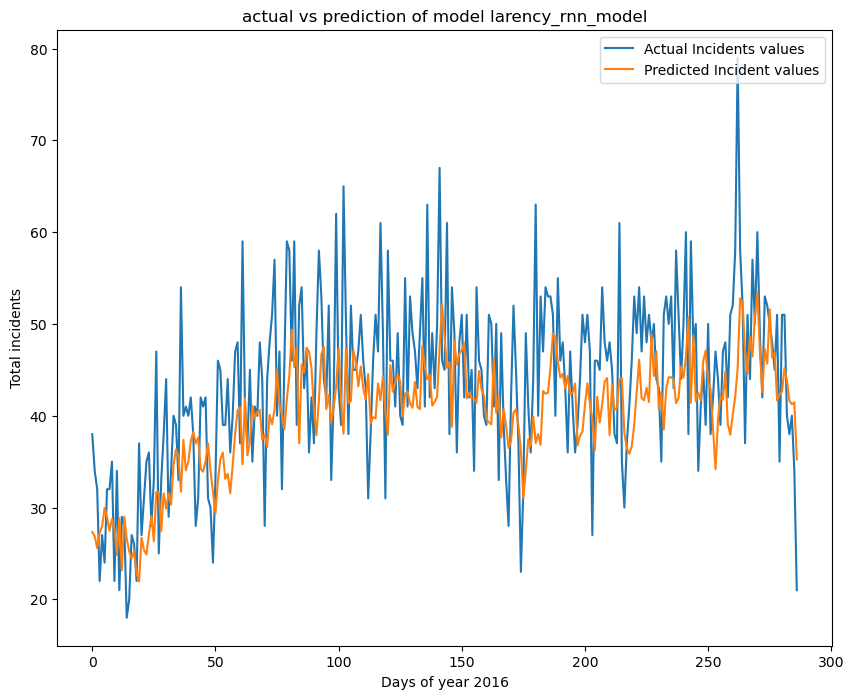

training model larency_lstm_model 



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 256)        │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 523,169 (2.00 MB)

 Trainable params: 523,169 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 193ms/step - loss: 491795.4688 - mse: 491795.4688 - val_loss: 138164.7969 - val_mse: 138164.7969
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - loss: 1038196.6250 - mse: 1038196.6250 - val_loss: 14806261.0000 - val_mse: 14806261.0000
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - loss: 7009013.0000 - mse: 7009013.0000 - val_loss: 811579.6875 - val_mse: 811579.6875
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - loss: 16308099.0000 - mse: 16308099.0000 - val_loss: 19372548.0000 - val_mse: 19372548.0000
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - loss: 154350160.0000 - mse: 154350160.0000 - val_loss: 1259288576.0000 - val_mse: 1259288576.0000
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - loss: 934568704.0000 - mse: 934568704.0000 - val_loss: 61944680.0000 - val_mse: 61944680.0000
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - loss: 35363364.0000 - mse: 35363364.0000 - val_loss: 150952.8281 - val_m

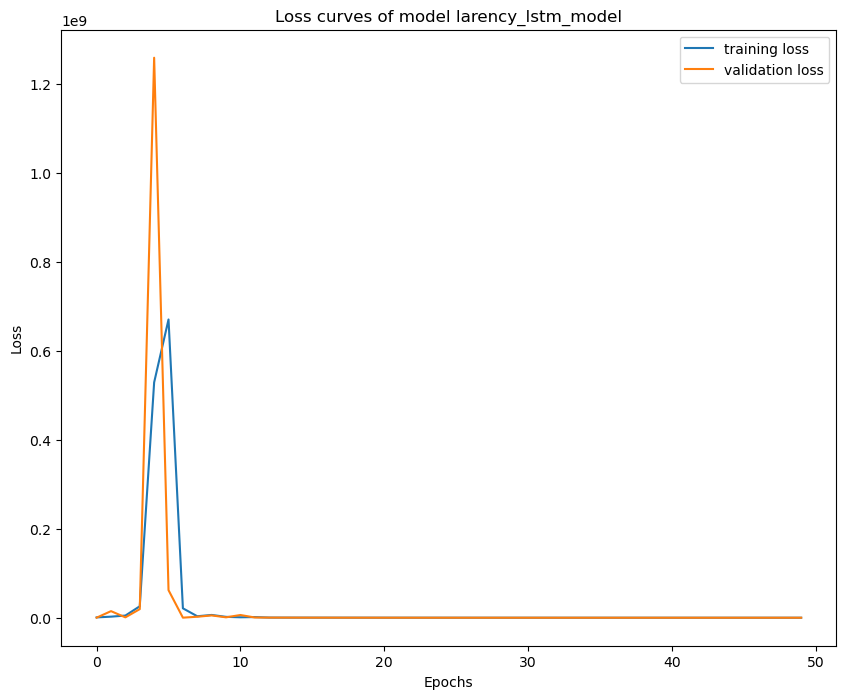

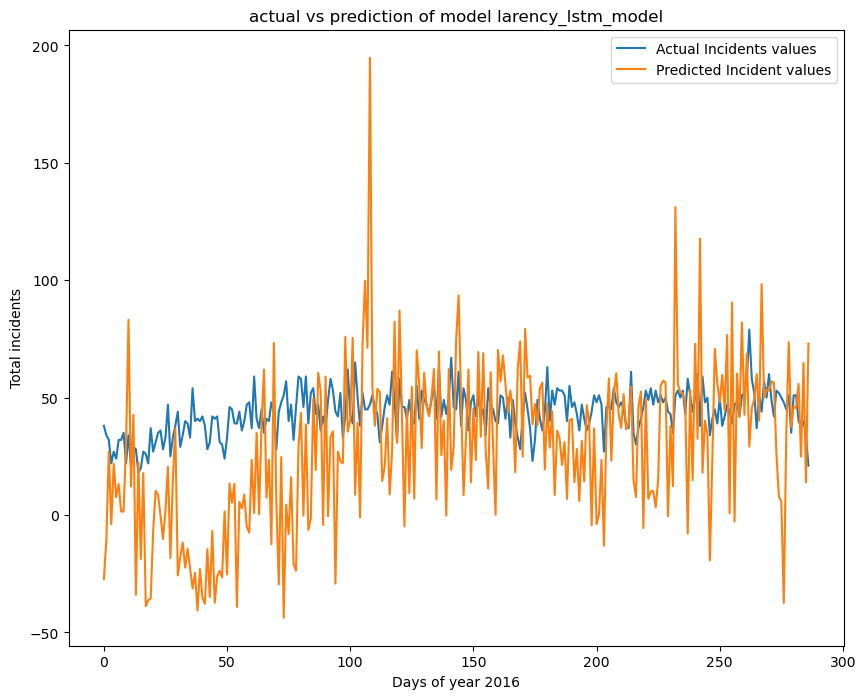

training model burglary_rnn_model 



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 30, 256)        │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 30, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ (None, 30, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_7 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,817 (511.00 KB)

 Trainable params: 130,817 (511.00 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - loss: 321.2336 - mse: 321.2336 - val_loss: 41.3029 - val_mse: 41.3029
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 105.3779 - mse: 105.3779 - val_loss: 45.2208 - val_mse: 45.2208
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 190.5932 - mse: 190.5932 - val_loss: 48.4834 - val_mse: 48.4834
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 67.1045 - mse: 67.1045 - val_loss: 53.9617 - val_mse: 53.9617
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 154.1759 - mse: 154.1759 - val_loss: 41.4839 - val_mse: 41.4839
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 84.4043 - mse: 84.4043 - val_loss: 71.9627 - val_mse: 71.9627
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 148.3111 - mse: 148.3111 - val_loss: 63.0414 - val_mse: 63.0414
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 108.0096 - mse: 108.0096 - val_loss: 43.1753 - val_mse: 43.1753
Epoch 9/50
18/

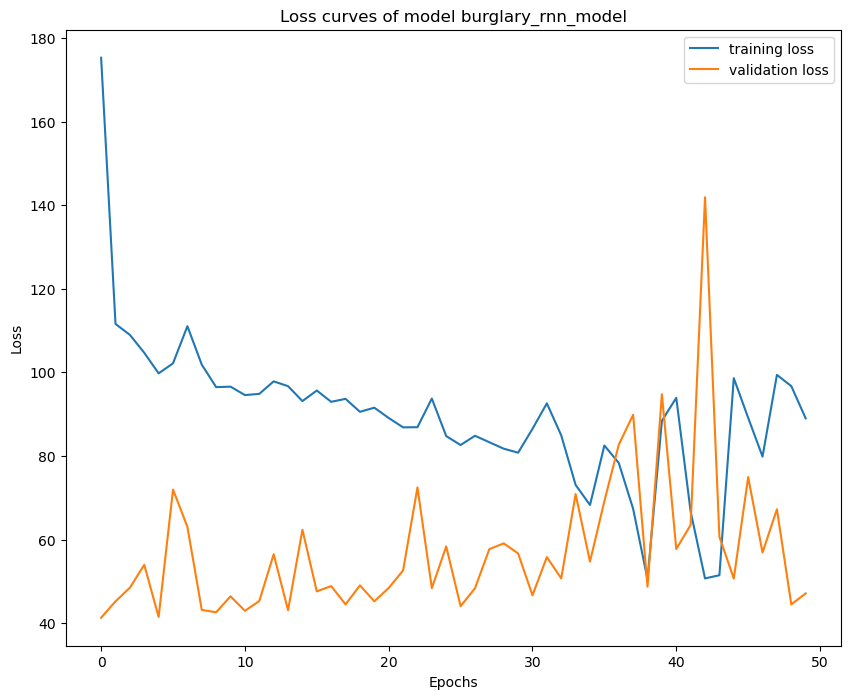

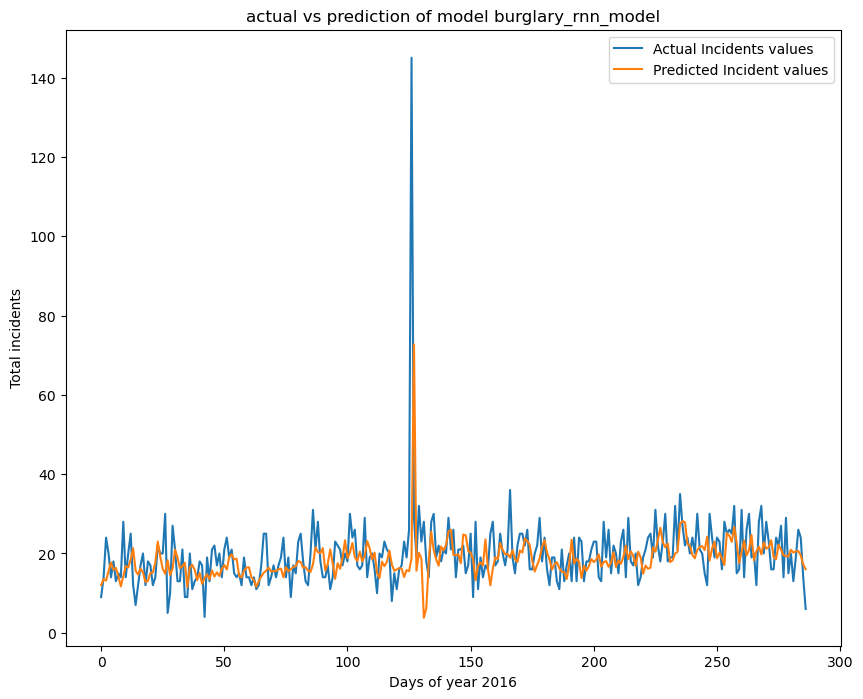

training model burglary_lstm_model 



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 30, 256)        │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 30, 128)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 523,169 (2.00 MB)

 Trainable params: 523,169 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 185ms/step - loss: 852.9695 - mse: 852.9695 - val_loss: 414.3992 - val_mse: 414.3992
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - loss: 1096.0093 - mse: 1096.0093 - val_loss: 655.6751 - val_mse: 655.6751
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - loss: 7359.4663 - mse: 7359.4663 - val_loss: 4717.4204 - val_mse: 4717.4204
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - loss: 54230.8438 - mse: 54230.8438 - val_loss: 528.4125 - val_mse: 528.4125
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - loss: 3002.5649 - mse: 3002.5649 - val_loss: 751.9454 - val_mse: 751.9454
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - loss: 970.9691 - mse: 970.9691 - val_loss: 369.2122 - val_mse: 369.2122
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - loss: 357.5256 - mse: 357.5256 - val_loss: 281.9140 - val_mse: 281.9140
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - loss: 315.3372 - mse: 315.3372 - val_loss: 700.

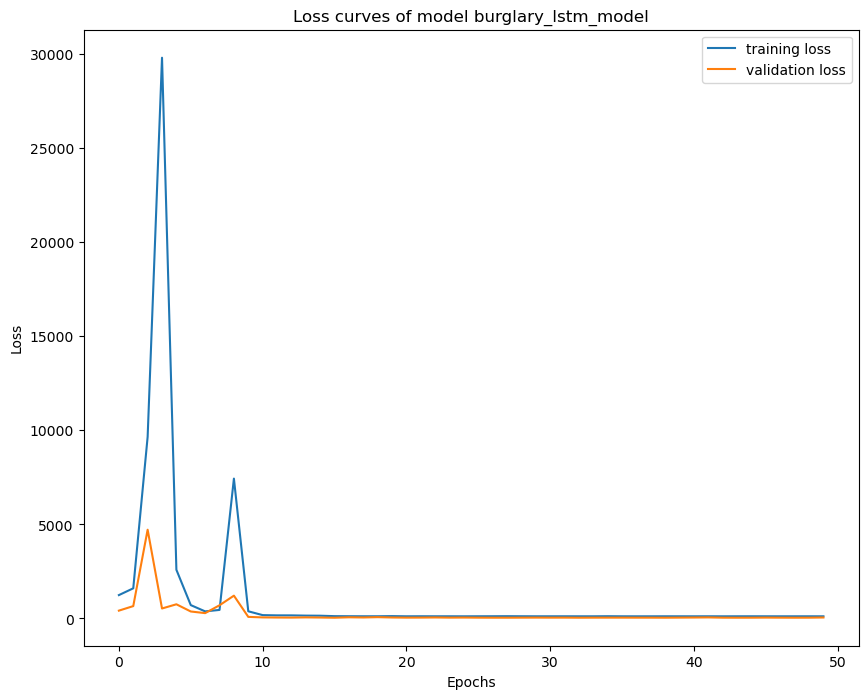

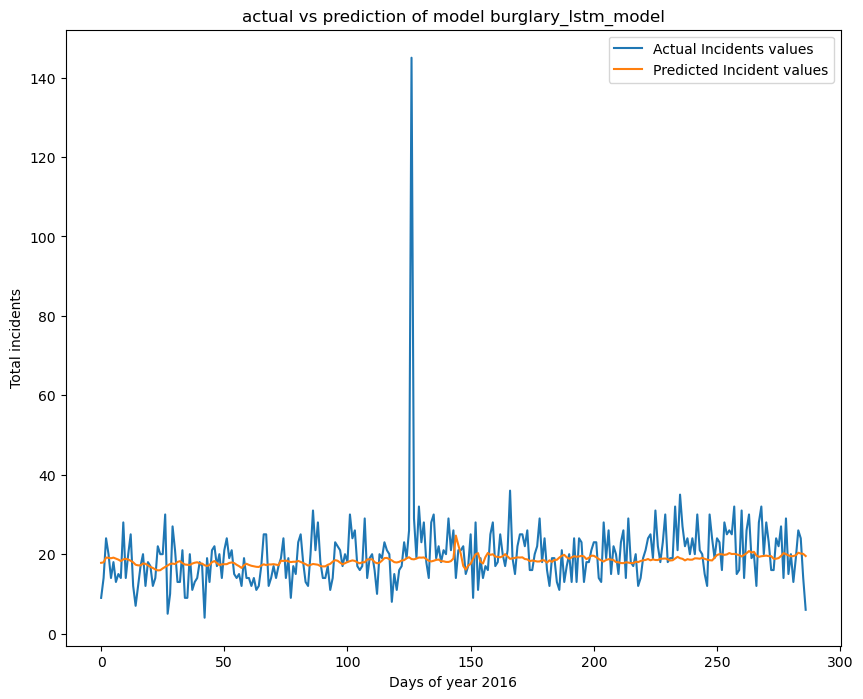

In [22]:
larency_results = train_models(larency_model,larency_train_X,larency_train_y,larency_test_X,larency_test_y)
burglary_results = train_models(burglary_model,burglary_train_X,burglary_train_y,burglary_test_X,burglary_test_y)

In [23]:
larency_df = pd.DataFrame(larency_results)
larency_df #why???

,model_name,train_loss,valiation_loss,test_loss
0,larency_rnn_model,1.092517e+02,8.463424e+01,74.912292
1,larency_lstm_model,2.541144e+07,2.746416e+07,1291.216797


In [24]:
burglary_df = pd.DataFrame(burglary_results)
burglary_df

,model_name,train_loss,valiation_loss,test_loss
0,burglary_rnn_model,89.849511,57.168167,97.460892
1,burglary_lstm_model,1181.018389,230.057484,88.251358


In [ ]:
#baki comments and other things mathe madva